In [8]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

In [9]:
MoviesDataset = pd.read_csv("DataSets/movies_dataset_final.csv", sep=',')

In [10]:
MoviesDataset.describe()

budget             id    popularity       revenue       runtime  \
count  4.536600e+04   45366.000000  45366.000000  4.536600e+04  45120.000000   
mean   4.238891e+06  107860.641339      2.930444  1.124022e+07     94.211104   
std    1.744483e+07  112021.858608      6.010525  6.439827e+07     38.279063   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26333.250000      0.390529  0.000000e+00     85.000000   
50%    0.000000e+00   59753.000000      1.133031  0.000000e+00     95.000000   
75%    0.000000e+00  156140.750000      3.704432  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count  release_year        return  
count  45366.000000  45366.000000  45366.000000  4.536600e+04  
mean       5.625114    110.178900   1991.900366  6.601888e+02  
std        1.914800    491.792041     24.017288  7.470153e+04  
min        0.000000      0.000000   1874.000000  0.000000e+00  
25%        5.000000      3.000000   1978.000000  0.000000e+00  
50%        6.000000     10.000000   2001.000000  0.000000e+00  
75%        6.800000     34.000000   2010.000000  0.000000e+00  
max       10.000000  14075.000000   2020.000000  1.239638e+07

In [11]:
MoviesDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45366 non-null  float64
 1   id                 45366 non-null  int64  
 2   original_language  45355 non-null  object 
 3   overview           44427 non-null  object 
 4   popularity         45366 non-null  float64
 5   release_date       45366 non-null  object 
 6   revenue            45366 non-null  float64
 7   runtime            45120 non-null  float64
 8   status             45287 non-null  object 
 9   tagline            20405 non-null  object 
 10  title              45366 non-null  object 
 11  vote_average       45366 non-null  float64
 12  vote_count         45366 non-null  float64
 13  release_year       45366 non-null  int64  
 14  return             45366 non-null  float64
 15  genre_names        45366 non-null  object 
 16  collection_name    453

Graficos de correlacion entre todas las variables

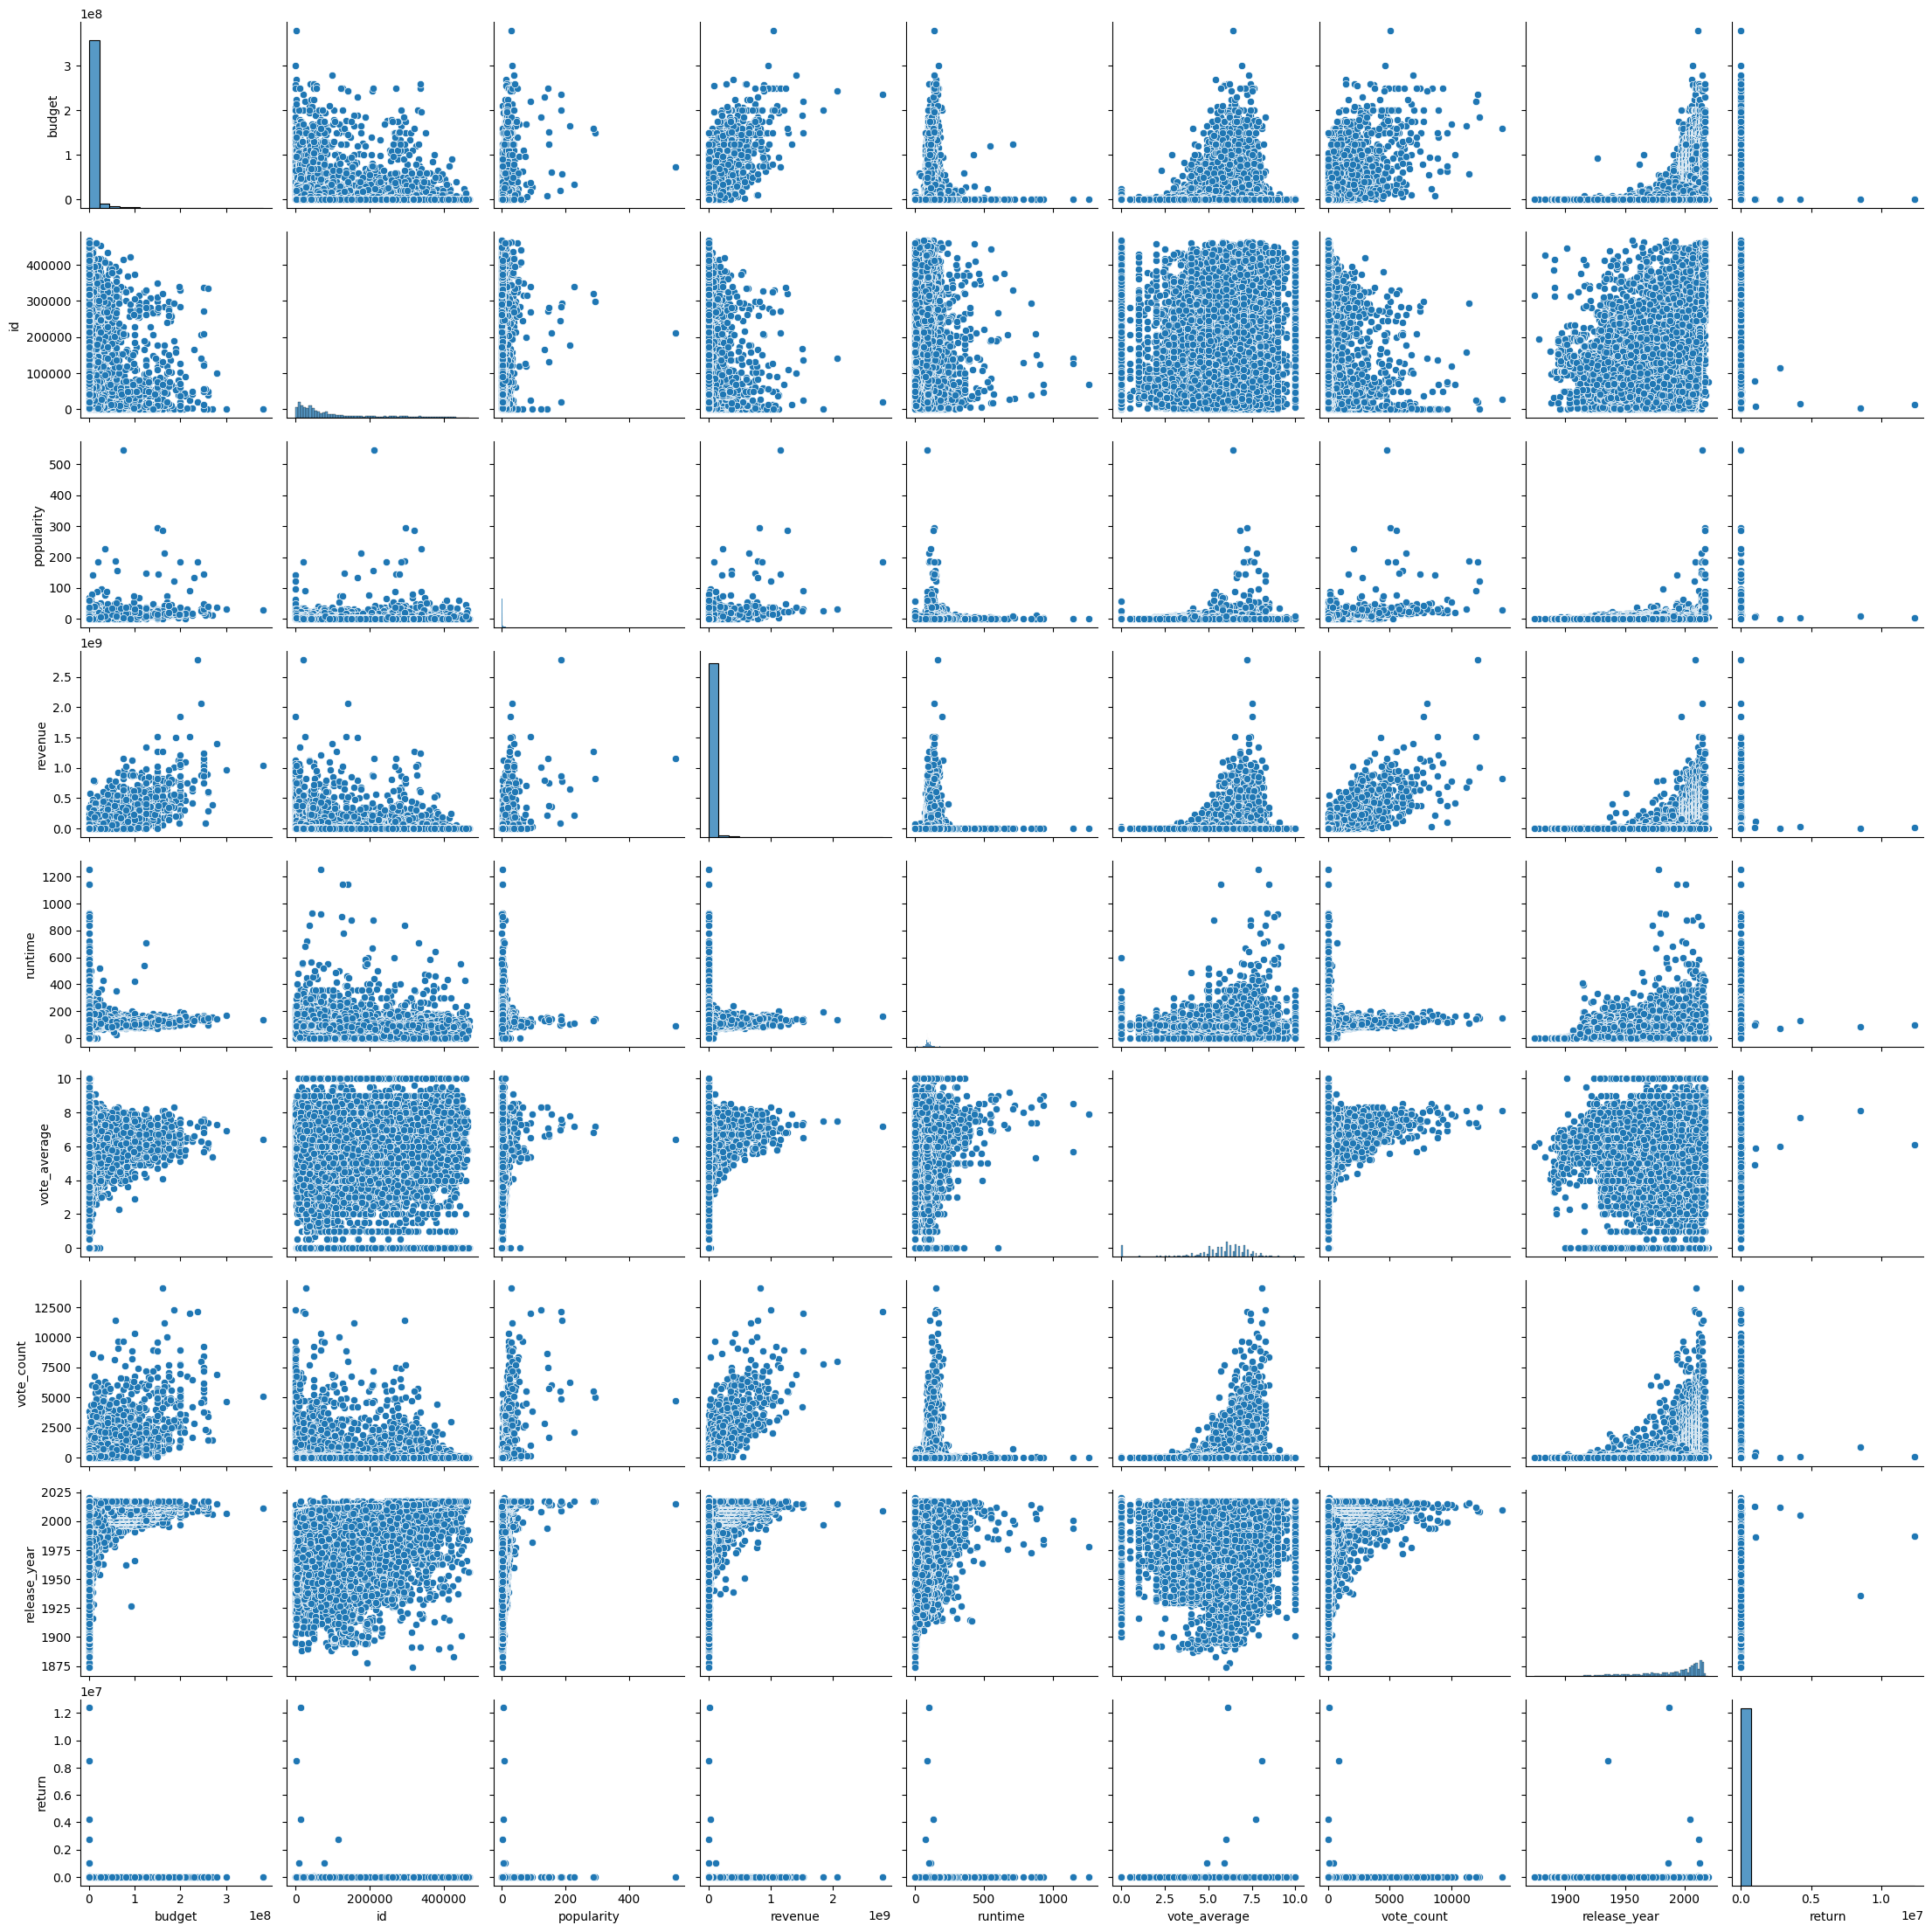

In [12]:
#Para ver los distintos scatter de las distintas variables:
sns.pairplot(MoviesDataset)
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_4136\961184606.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = MoviesDataset.corr(method='pearson')


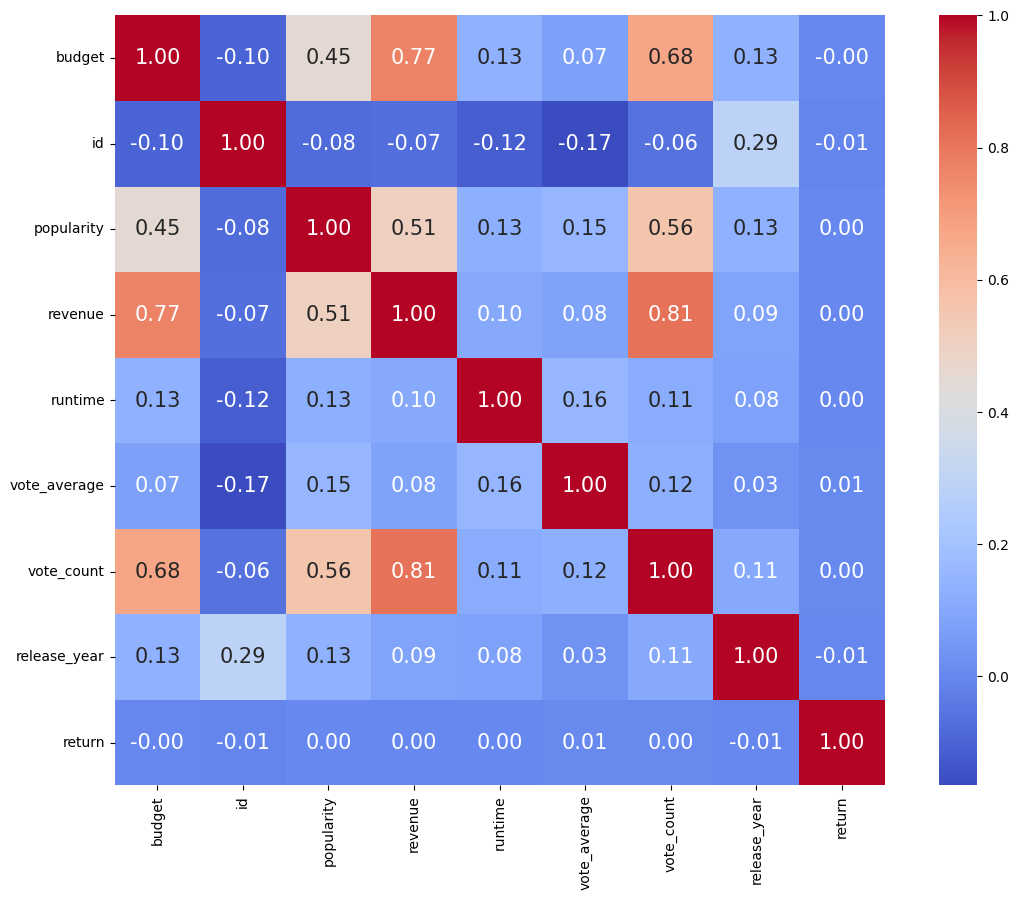

In [13]:
#Para ver el mapa de calor de las correlaciones entre las variables:

#Podemos notar que hay relaciones bastante fuertes entre revenue, budget, popularity y vote count,
#lo cual nos indica que, en la mayoría de los casos, a mayor inversión, mayor retorno y mayor aceptación por parte del público.

corr = MoviesDataset.corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')

plt.show()

Revenue, budget y return

<Axes: xlabel='budget', ylabel='revenue'>

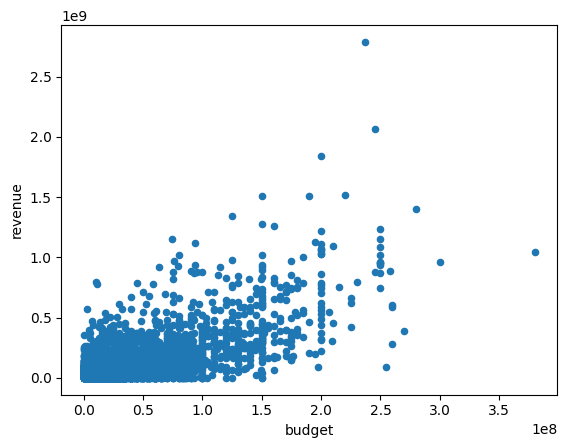

In [14]:
#Para ver la relación entre presupuesto e ingresos:
#Podemos ver que, si bien no es una relación lineal, se puede afirmar que, en grandes rasgos, a mayor presupuesto mayores ingresos.

MoviesDataset.plot.scatter(x='budget', y='revenue')

In [15]:
#Para ver los máximos de las variables budget, revenue y return:

BudgetMax = MoviesDataset.budget.idxmax()

RevenueMax = MoviesDataset.revenue.idxmax()

ReturnMax = MoviesDataset["return"].idxmax()

In [16]:
#Máximo de budget:
#La película con el volumen de inversión mas alto es Piratas del Caribe: Navegando en Aguas Misteriosas.
MoviesDataset.loc[BudgetMax]

budget                                                     380000000.0
id                                                                1865
original_language                                                   en
overview             Captain Jack Sparrow crosses paths with a woma...
popularity                                                    27.88772
release_date                                                2011-05-14
revenue                                                   1045713802.0
runtime                                                          136.0
status                                                        Released
tagline                                    Live Forever Or Die Trying.
title                      Pirates of the Caribbean: On Stranger Tides
vote_average                                                       6.4
vote_count                                                      5068.0
release_year                                                      2011
return

In [17]:
#Máximo de revenue:
#La película con el volumen de ingresos más alto es Avatar.
MoviesDataset.loc[RevenueMax]

budget                                                     237000000.0
id                                                               19995
original_language                                                   en
overview             In the 22nd century, a paraplegic Marine is di...
popularity                                                  185.070892
release_date                                                2009-12-10
revenue                                                   2787965087.0
runtime                                                          162.0
status                                                        Released
tagline                                    Enter the World of Pandora.
title                                                           Avatar
vote_average                                                       7.2
vote_count                                                     12114.0
release_year                                                      2009
return

In [18]:
#Máximo de return:
#Podemos ver que es un outliar, ya que el presupuesto estaba arbitrariamente establecido en 1, esto da como resultado un retorno sobre la inversión
#muy alto y desproporcionado.

MoviesDataset.loc[ReturnMax]

budget                                                             1.0
id                                                               13703
original_language                                                   en
overview             A college freshman returns to Los Angeles for ...
popularity                                                    4.028679
release_date                                                1987-11-06
revenue                                                     12396383.0
runtime                                                           98.0
status                                                        Released
tagline              In Beverly Hills, you can have anything your h...
title                                                   Less Than Zero
vote_average                                                       6.1
vote_count                                                        77.0
release_year                                                      1987
return

{'whiskers': [<matplotlib.lines.Line2D at 0x24471b34690>,
 'caps': [<matplotlib.lines.Line2D at 0x24471aa8c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24471b34990>],
 'medians': [<matplotlib.lines.Line2D at 0x24471ad4310>],
 'fliers': [<matplotlib.lines.Line2D at 0x24471b07290>],
 'means': []}

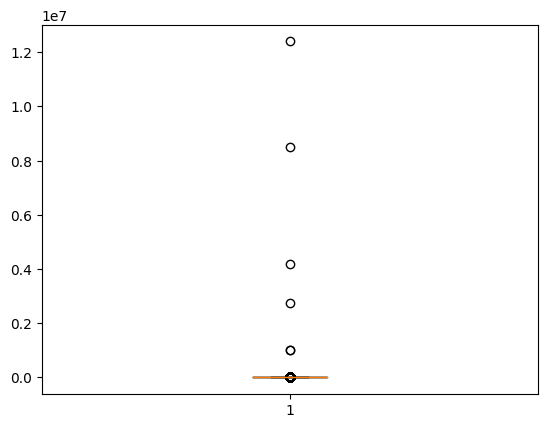

In [19]:
#Podemos ver return en un diagrama de cajas, para ver si esto se repite a lo largo del dataset,
#vemos que hay valores muchos valores muy por fuera de la media,
#lo que nos indica que los outliers en esta variable son muchos
#y desproporcionados:

plt.boxplot(MoviesDataset['return'])

<Axes: xlabel='budget', ylabel='return'>

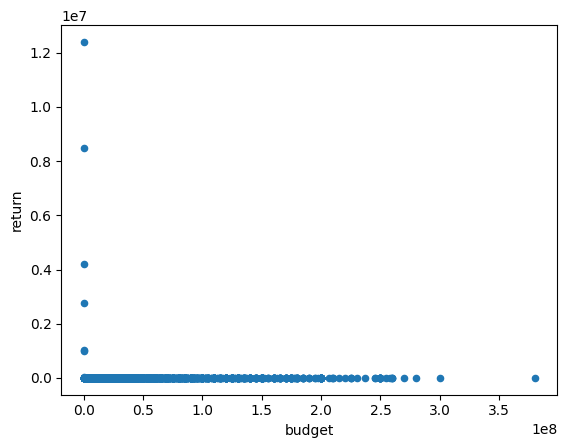

In [20]:
#Con un scatter entre presupuesto y retorno podemos ver que los valores atípicos de la variable return,
#se dan por valores de budget muy bajos,
#un procedimiento inteligente sería borrar estos valores atípicos, teniendo en cuenta un límite inferior para la variable budget.

MoviesDataset.plot.scatter(x='budget', y='return')

Vote Average y Popularity

<Axes: xlabel='vote_average', ylabel='popularity'>

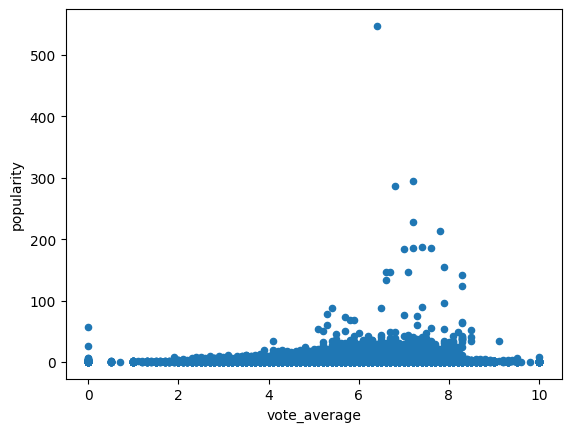

In [22]:
#Para ver la relación entre vote_average y popularity:

MoviesDataset.plot.scatter(x='vote_average', y='popularity')

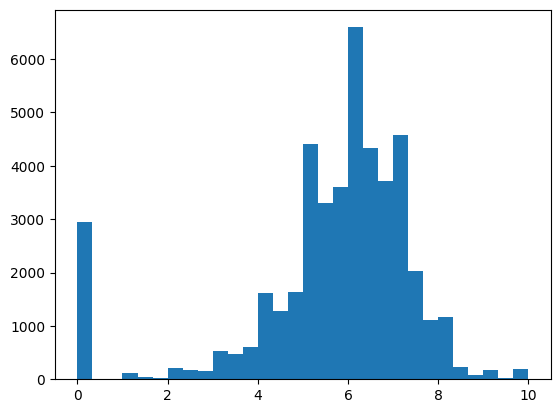

In [33]:
#Para ver un histograma de frecuencias de los votos promedio de las películas:
plt.hist(MoviesDataset["vote_average"], bins=30)

plt.show()

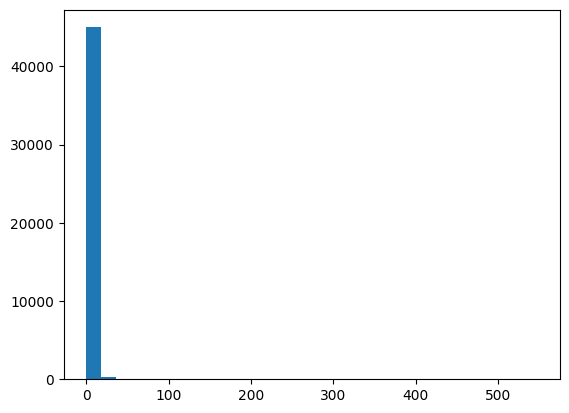

In [34]:
#Para ver un histograma de frecuencias de los votos promedio de las películas:
#Vemos que hay outliers.
plt.hist(MoviesDataset["popularity"], bins=30)

plt.show()

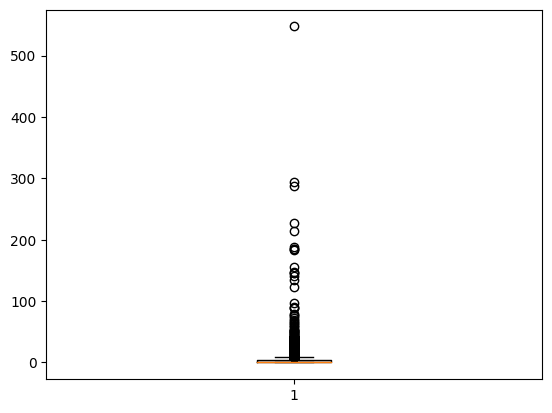

In [38]:
#Diagrama de cajas para ver los outliers de popularity:

plt.boxplot(MoviesDataset['popularity'])

plt.show()

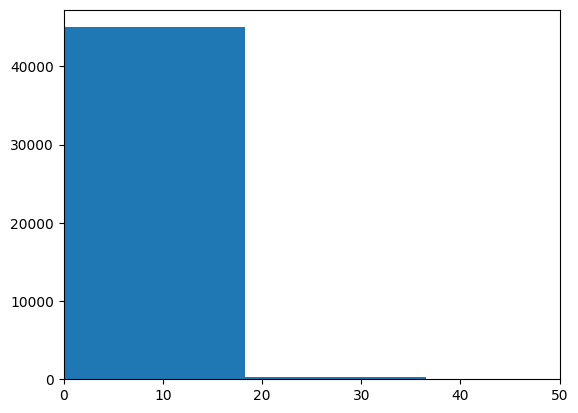

In [35]:
#Para ver un histograma de frecuencias de los votos promedio de las películas sin outliers:
plt.hist(MoviesDataset["popularity"], bins=30)
plt.xlim(0, 50)

plt.show()

In [23]:
#Para ver el valor máximo de popularity:
#La película con mayor popularidad es Minions.

PopularityMax = MoviesDataset["popularity"].idxmax()

MoviesDataset.loc[PopularityMax]

budget                                                      74000000.0
id                                                              211672
original_language                                                   en
overview             Minions Stuart, Kevin and Bob are recruited by...
popularity                                                  547.488298
release_date                                                2015-06-17
revenue                                                   1156730962.0
runtime                                                           91.0
status                                                        Released
tagline                   Before Gru, they had a history of bad bosses
title                                                          Minions
vote_average                                                       6.4
vote_count                                                      4729.0
release_year                                                      2015
return

In [36]:
#Para ver el máximo de vote_average:

VoteAverageMax = MoviesDataset["vote_average"].idxmax()

MoviesDataset.loc[VoteAverageMax]

budget                                                             0.0
id                                                               58372
original_language                                                   en
overview             On Christmas eve, a relentlessly cheerful woma...
popularity                                                    0.119713
release_date                                                1995-11-17
revenue                                                            0.0
runtime                                                           91.0
status                                                        Released
tagline                               The most twisted Christmas ever.
title                                                         Reckless
vote_average                                                      10.0
vote_count                                                         1.0
release_year                                                      1995
return

Release year y revenue

<Axes: xlabel='release_year', ylabel='revenue'>

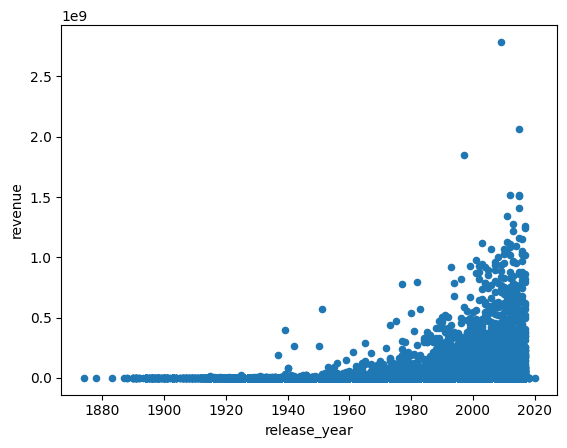

In [24]:
#Para ver la relación entre el año de estreno y los ingresos,
#vemos que la industria del cine aumentó sus ingresos considerablemente a través de los años:

MoviesDataset.plot.scatter(x='release_year', y='revenue')

Frecuencias lenguajes, companias y países:

In [39]:
#Para ver que cantidad de películas hay en cada idioma, podemos ver que el inglés es, por mucho, el lenguaje más común,
#seguido por el francés y el italiano:

from collections import Counter

lenguajes = MoviesDataset["original_language"]

frecuenciasL = Counter(lenguajes)

frecuencias_ordenadas = frecuenciasL.most_common()

for lenguaje, frecuenciaL in frecuencias_ordenadas:
    print(f"Lenguaje: {lenguaje}, Frecuencia: {frecuenciaL}")

Lenguaje: en, Frecuencia: 32202
Lenguaje: fr, Frecuencia: 2434
Lenguaje: it, Frecuencia: 1527
Lenguaje: ja, Frecuencia: 1355
Lenguaje: de, Frecuencia: 1079
Lenguaje: es, Frecuencia: 991
Lenguaje: ru, Frecuencia: 805
Lenguaje: hi, Frecuencia: 507
Lenguaje: ko, Frecuencia: 444
Lenguaje: zh, Frecuencia: 405
Lenguaje: sv, Frecuencia: 386
Lenguaje: pt, Frecuencia: 315
Lenguaje: cn, Frecuencia: 313
Lenguaje: fi, Frecuencia: 300
Lenguaje: nl, Frecuencia: 246
Lenguaje: da, Frecuencia: 227
Lenguaje: pl, Frecuencia: 218
Lenguaje: tr, Frecuencia: 150
Lenguaje: cs, Frecuencia: 129
Lenguaje: el, Frecuencia: 113
Lenguaje: no, Frecuencia: 106
Lenguaje: fa, Frecuencia: 101
Lenguaje: hu, Frecuencia: 100
Lenguaje: th, Frecuencia: 78
Lenguaje: ta, Frecuencia: 78
Lenguaje: he, Frecuencia: 67
Lenguaje: sr, Frecuencia: 63
Lenguaje: ro, Frecuencia: 57
Lenguaje: te, Frecuencia: 45
Lenguaje: ar, Frecuencia: 39
Lenguaje: ml, Frecuencia: 36
Lenguaje: xx, Frecuencia: 34
Lenguaje: bn, Frecuencia: 29
Lenguaje: hr, 

In [77]:
#Para ver la frecuencia de los países productores de películas, vemos que la mayoría de las películas se filman en USA:

genres = MoviesDataset["genre_names"]

frecuencias = Counter(genres)

frecuencias_ordenadas = frecuencias.most_common()

for genres, frecuencia in frecuencias_ordenadas:
    print(f"Lenguaje: {genres}, Frecuencia: {frecuencia}")

Lenguaje: [], Frecuencia: 45366


In [78]:
MoviesDataset["genre_names"]

0        []
1        []
2        []
3        []
4        []
         ..
45361    []
45362    []
45363    []
45364    []
45365    []
Name: genre_names, Length: 45366, dtype: object

In [31]:
#Para ver la frecuencia de cada compania, vemos que hay muchos valores faltantes en los datos de las companias:

companias = MoviesDataset["companies_names"]

frecuencias = Counter(companias)

frecuencias_ordenadas = frecuencias.most_common()

for companias, frecuencia in frecuencias_ordenadas:
    print(f"Lenguaje: {companias}, Frecuencia: {frecuencia}")

Lenguaje: [], Frecuencia: 11842
Lenguaje: ['Metro-Goldwyn-Mayer (MGM)'], Frecuencia: 741
Lenguaje: ['Warner Bros.'], Frecuencia: 541
Lenguaje: ['Paramount Pictures'], Frecuencia: 506
Lenguaje: ['Twentieth Century Fox Film Corporation'], Frecuencia: 438
Lenguaje: ['Universal Pictures'], Frecuencia: 319
Lenguaje: ['RKO Radio Pictures'], Frecuencia: 247
Lenguaje: ['Columbia Pictures Corporation'], Frecuencia: 207
Lenguaje: ['Columbia Pictures'], Frecuencia: 148
Lenguaje: ['Mosfilm'], Frecuencia: 144
Lenguaje: ['Walt Disney Pictures'], Frecuencia: 85
Lenguaje: ['Universal International Pictures (UI)'], Frecuencia: 82
Lenguaje: ['New Line Cinema'], Frecuencia: 75
Lenguaje: ['Walt Disney Productions'], Frecuencia: 75
Lenguaje: ['Touchstone Pictures'], Frecuencia: 70
Lenguaje: ['Shaw Brothers'], Frecuencia: 69
Lenguaje: ['Toho Company'], Frecuencia: 65
Lenguaje: ['TriStar Pictures'], Frecuencia: 62
Lenguaje: ['Orion Pictures'], Frecuencia: 61
Lenguaje: ['Hammer Film Productions'], Frecuencia:

In [32]:
#Para ver la frecuencia de los países productores de películas, vemos que la mayoría de las películas se filman en USA:

countries = MoviesDataset["countries_names"]

frecuencias = Counter(countries)

frecuencias_ordenadas = frecuencias.most_common()

for countries, frecuencia in frecuencias_ordenadas:
    print(f"Lenguaje: {countries}, Frecuencia: {frecuencia}")

Lenguaje: ['United States of America'], Frecuencia: 17839
Lenguaje: [], Frecuencia: 6275
Lenguaje: ['United Kingdom'], Frecuencia: 2226
Lenguaje: ['France'], Frecuencia: 1642
Lenguaje: ['Japan'], Frecuencia: 1357
Lenguaje: ['Italy'], Frecuencia: 1030
Lenguaje: ['Canada'], Frecuencia: 837
Lenguaje: ['Germany'], Frecuencia: 749
Lenguaje: ['India'], Frecuencia: 734
Lenguaje: ['Russia'], Frecuencia: 717
Lenguaje: ['United Kingdom', 'United States of America'], Frecuencia: 569
Lenguaje: ['South Korea'], Frecuencia: 435
Lenguaje: ['Spain'], Frecuencia: 399
Lenguaje: ['Hong Kong'], Frecuencia: 364
Lenguaje: ['Canada', 'United States of America'], Frecuencia: 364
Lenguaje: ['Australia'], Frecuencia: 335
Lenguaje: ['Sweden'], Frecuencia: 332
Lenguaje: ['Finland'], Frecuencia: 270
Lenguaje: ['France', 'Italy'], Frecuencia: 235
Lenguaje: ['Germany', 'United States of America'], Frecuencia: 215
Lenguaje: ['Brazil'], Frecuencia: 208
Lenguaje: ['Poland'], Frecuencia: 199
Lenguaje: ['Denmark'], Frecu

Title y Overview

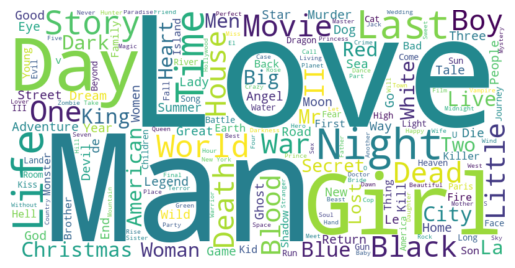

In [69]:
#Para generar una nube de las palabras más utilizadas en los títulos:

Titulos = MoviesDataset["title"].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Titulos)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

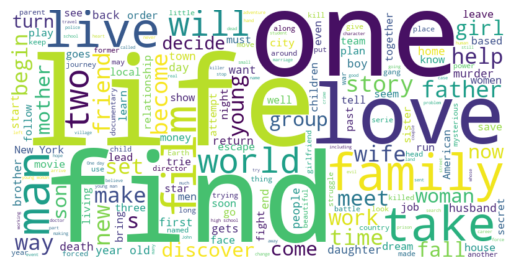

In [72]:
#Hacemos lo mismo para la columna overview:

Overviews = MoviesDataset["overview"].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Overviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [59]:
#Vamos a revisar los largos de las reseñas y que tienen datos erroneos:
#Creamos dos listas y las completamos con un ciclo for, una con los largos y otra con los valores erroneos.

ExtensionesOverview = []
OverviewsErroneos = []

for i in range(len(MoviesDataset)):
    if type(MoviesDataset["overview"][i]) == str:
        ExtensionesOverview.append(len(MoviesDataset["overview"][i]))
    elif type(MoviesDataset["overview"][i]) != str:
        ExtensionesOverview.append(0)
        OverviewsErroneos.append((MoviesDataset["overview"][i],i))

In [76]:
#Podemos ver que los datos erroneos de la columna overview son datos faltantes, nulos:

OverviewsErroneos

[(nan, 32),
 (nan, 300),
 (nan, 634),
 (nan, 635),
 (nan, 641),
 (nan, 644),
 (nan, 682),
 (nan, 793),
 (nan, 803),
 (nan, 822),
 (nan, 833),
 (nan, 867),
 (nan, 1029),
 (nan, 1083),
 (nan, 1396),
 (nan, 1417),
 (nan, 2146),
 (nan, 2200),
 (nan, 4140),
 (nan, 4765),
 (nan, 4809),
 (nan, 5975),
 (nan, 6032),
 (nan, 6260),
 (nan, 8588),
 (nan, 9017),
 (nan, 9200),
 (nan, 9449),
 (nan, 9654),
 (nan, 10035),
 (nan, 10641),
 (nan, 10724),
 (nan, 11642),
 (nan, 12008),
 (nan, 12973),
 (nan, 13250),
 (nan, 13611),
 (nan, 13614),
 (nan, 13625),
 (nan, 13707),
 (nan, 13712),
 (nan, 13719),
 (nan, 13773),
 (nan, 13809),
 (nan, 13815),
 (nan, 13857),
 (nan, 14066),
 (nan, 14087),
 (nan, 14127),
 (nan, 14151),
 (nan, 14183),
 (nan, 14189),
 (nan, 14244),
 (nan, 14589),
 (nan, 14689),
 (nan, 14729),
 (nan, 14748),
 (nan, 14806),
 (nan, 14829),
 (nan, 14929),
 (nan, 14948),
 (nan, 14949),
 (nan, 15262),
 (nan, 15263),
 (nan, 15303),
 (nan, 15388),
 (nan, 15442),
 (nan, 15794),
 (nan, 15902),
 (nan, 

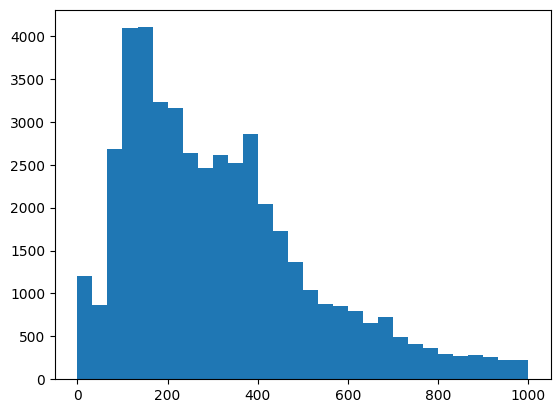

In [67]:
#Para ver un histograma de frecuencias de los largos de las reseñas:
#Vemos que la gran mayoria oscila cerca de las 200 palabras y se extienden hasta 1000 que parece ser el maximo.

plt.hist(ExtensionesOverview, bins=30)

plt.show()